In [148]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.ticker
plt.rcParams['figure.figsize'] = (10,8)

import tensorflow.keras
from tensorflow.keras import utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.models import  load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Conv2D , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

In [149]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

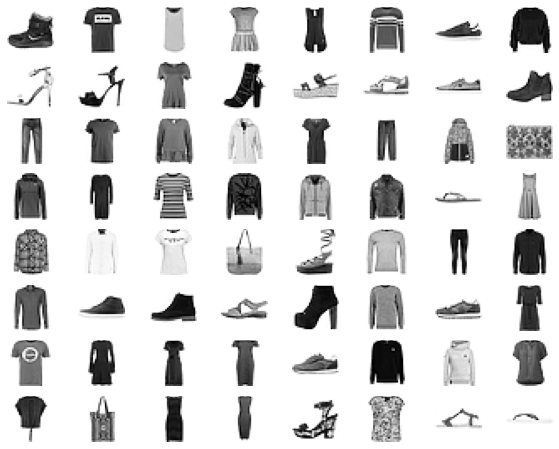

In [150]:
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [151]:
xtrain.shape , xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [152]:
# reshape 
xtrain =xtrain.reshape((xtrain.shape[0], 28,28,1))
xtest =xtest.reshape((xtest.shape[0],28,28,1))

In [153]:
# convert to float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [154]:
# normalizing the data

xtrain /= 255
xtest /= 255

In [155]:
# one-hot encoding

ytrain= utils.to_categorical(ytrain, num_classes=10)
ytest= utils.to_categorical(ytest, num_classes=10)

In [129]:
# building the model

model = Sequential([
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    BatchNormalization(),
    Conv2D(64 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    Flatten(),
    Dense(500, activation ='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10 , activation='softmax')
])

In [130]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_26 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 23, 23, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 21, 21, 64)       

In [131]:
# compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [132]:
# data preparation

data_gen = ImageDataGenerator(rotation_range=80, 
                              width_shift_range=0.2, 
                              height_shift_range=0.2, 
                              shear_range=0.3, 
                              zoom_range=0.2,
                              fill_mode='nearest',
                              horizontal_flip=True)

test_gen =ImageDataGenerator()

In [133]:
train_generator = data_gen.flow(xtrain, ytrain, batch_size=64)
test_generator = test_gen.flow(xtest, ytest, batch_size=64)

In [134]:
history = model.fit_generator(train_generator, steps_per_epoch=len(xtrain)// 64, epochs=8 , validation_data=test_generator, validation_steps=10000//64)


Epoch 1/8
937/937 [==============================] - 522s 558ms/step - loss: 1.3194 - acc: 0.5375 - val_loss: 0.9232 - val_acc: 0.7062
Epoch 2/8
937/937 [==============================] - 547s 584ms/step - loss: 0.9135 - acc: 0.6748 - val_loss: 0.8279 - val_acc: 0.7024
Epoch 3/8
937/937 [==============================] - 454s 485ms/step - loss: 0.8052 - acc: 0.7113 - val_loss: 0.8796 - val_acc: 0.7174
Epoch 4/8
937/937 [==============================] - 418s 446ms/step - loss: 0.7371 - acc: 0.7353 - val_loss: 0.6402 - val_acc: 0.7754
Epoch 5/8
937/937 [==============================] - 411s 439ms/step - loss: 0.7071 - acc: 0.7487 - val_loss: 0.6332 - val_acc: 0.7771
Epoch 6/8
937/937 [==============================] - 411s 438ms/step - loss: 0.6698 - acc: 0.7617 - val_loss: 0.5316 - val_acc: 0.8071
Epoch 7/8
937/937 [==============================] - 412s 439ms/step - loss: 0.6482 - acc: 0.7680 - val_loss: 0.5858 - val_acc: 0.7897
Epoch 8/8
937/937 [==============================] - 46

In [143]:
K.clear_session()

In [144]:
model2 = Sequential([
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    BatchNormalization(),
    Conv2D(64 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    Flatten(),
    Dense(500, activation ='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10 , activation='softmax')
])

In [145]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [146]:
data_gen = ImageDataGenerator(width_shift_range=0.2, 
                              height_shift_range=0.2, 
                              shear_range=0.2, 
                              zoom_range=0.1,
                              fill_mode='nearest')

test_gen =ImageDataGenerator()

In [147]:
train_generator = data_gen.flow(xtrain, ytrain, batch_size=64)
test_generator = test_gen.flow(xtest, ytest, batch_size=64)

In [148]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history = model2.fit_generator(train_generator, steps_per_epoch=len(xtrain)// 64, epochs=8 , validation_data=test_generator,callbacks=[callback], validation_steps=10000//64)


Epoch 1/8
937/937 [==============================] - 446s 476ms/step - loss: 0.6763 - acc: 0.7543 - val_loss: 1.8662 - val_acc: 0.6930
Epoch 2/8
937/937 [==============================] - 503s 537ms/step - loss: 0.4893 - acc: 0.8202 - val_loss: 0.9810 - val_acc: 0.8023
Epoch 3/8
937/937 [==============================] - 485s 517ms/step - loss: 0.4277 - acc: 0.8420 - val_loss: 0.7163 - val_acc: 0.8188
Epoch 4/8
937/937 [==============================] - 425s 454ms/step - loss: 0.4049 - acc: 0.8511 - val_loss: 0.4084 - val_acc: 0.8570
Epoch 5/8
937/937 [==============================] - 497s 531ms/step - loss: 0.3847 - acc: 0.8580 - val_loss: 0.3344 - val_acc: 0.8792
Epoch 6/8
937/937 [==============================] - 545s 582ms/step - loss: 0.3574 - acc: 0.8683 - val_loss: 0.3195 - val_acc: 0.8849
Epoch 8/8
937/937 [==============================] - 537s 573ms/step - loss: 0.3459 - acc: 0.8733 - val_loss: 0.3520 - val_acc: 0.8655


In [162]:
K.clear_session()

In [163]:
model3 = Sequential([
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    BatchNormalization(),
    Conv2D(64 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    Flatten(),
    Dense(500, activation ='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10 , activation='softmax')
])

In [164]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [165]:
data_gen = ImageDataGenerator(width_shift_range=0.1, 
                              height_shift_range=0.1, 
                              shear_range=0.1, 
                              fill_mode='nearest')

test_gen =ImageDataGenerator()

In [166]:
train_generator = data_gen.flow(xtrain, ytrain, batch_size=64)
test_generator = test_gen.flow(xtest, ytest, batch_size=64)

In [158]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history = model3.fit_generator(train_generator, steps_per_epoch=len(xtrain)// 64, epochs=8 , validation_data=test_generator,callbacks=[callback], validation_steps=10000//64)


Epoch 1/8
937/937 [==============================] - 532s 568ms/step - loss: 0.5576 - acc: 0.7992 - val_loss: 0.3659 - val_acc: 0.8712
Epoch 2/8
937/937 [==============================] - 558s 595ms/step - loss: 0.4006 - acc: 0.8526 - val_loss: 0.3486 - val_acc: 0.8783
Epoch 3/8
937/937 [==============================] - 435s 464ms/step - loss: 0.3408 - acc: 0.8752 - val_loss: 0.4031 - val_acc: 0.8815
Epoch 4/8
937/937 [==============================] - 452s 483ms/step - loss: 0.3115 - acc: 0.8845 - val_loss: 0.2936 - val_acc: 0.8943
Epoch 5/8
937/937 [==============================] - 396s 422ms/step - loss: 0.2931 - acc: 0.8929 - val_loss: 0.3342 - val_acc: 0.8840
Epoch 6/8
937/937 [==============================] - 516s 551ms/step - loss: 0.2801 - acc: 0.8975 - val_loss: 0.2650 - val_acc: 0.9011
Epoch 7/8
937/937 [==============================] - 571s 609ms/step - loss: 0.2638 - acc: 0.9034 - val_loss: 0.2847 - val_acc: 0.8946
Epoch 8/8
937/937 [==============================] - 43

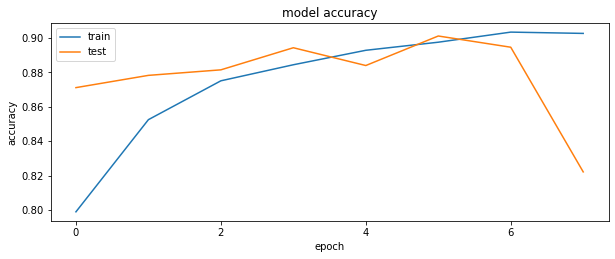

In [169]:
plt.rcParams['figure.figsize'] = (10,8)
plt.subplot(2,1,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

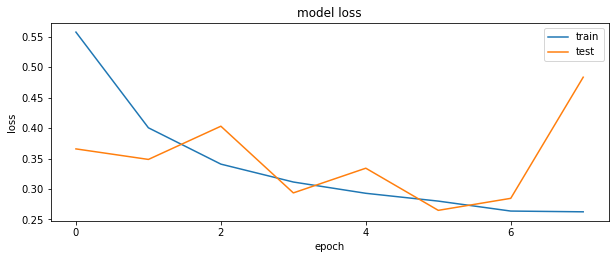

In [170]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

In [175]:
K.clear_session()

In [12]:
model4 = Sequential([
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    BatchNormalization(),
    Conv2D(64 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    Flatten(),
    Dense(500, activation ='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10 , activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# compiling the model

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history2 = model4.fit(xtrain, ytrain, epochs=15 , verbose =1 , batch_size=80, callbacks=[callback], validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 296s 6ms/sample - loss: 0.4197 - acc: 0.8502 - val_loss: 0.4985 - val_acc: 0.8376
Epoch 2/15
48000/48000 [==============================] - 314s 7ms/sample - loss: 0.2736 - acc: 0.9000 - val_loss: 0.6968 - val_acc: 0.8667
Epoch 3/15
48000/48000 [==============================] - 295s 6ms/sample - loss: 0.2351 - acc: 0.9137 - val_loss: 0.2917 - val_acc: 0.8953
Epoch 4/15
48000/48000 [==============================] - 302s 6ms/sample - loss: 0.1980 - acc: 0.9276 - val_loss: 0.4263 - val_acc: 0.9007
Epoch 5/15
48000/48000 [==============================] - 305s 6ms/sample - loss: 0.1729 - acc: 0.9362 - val_loss: 0.2372 - val_acc: 0.9194
Epoch 6/15
48000/48000 [==============================] - 336s 7ms/sample - loss: 0.1504 - acc: 0.9449 - val_loss: 0.2981 - val_acc: 0.9134
Epoch 7/15
48000/48000 [==============================] - 396s 8ms/sample - loss: 0.1296 - acc: 0.9526 - val_l

In [15]:
# testing the model
score = model4.evaluate(xtest, ytest)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 9s 860us/sample - loss: 0.3040 - acc: 0.9090

Test accuracy:  0.909


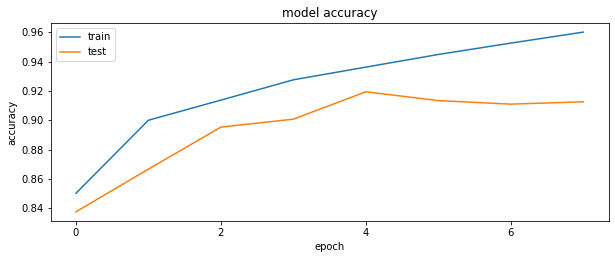

In [17]:
plt.subplot(2,1,2)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

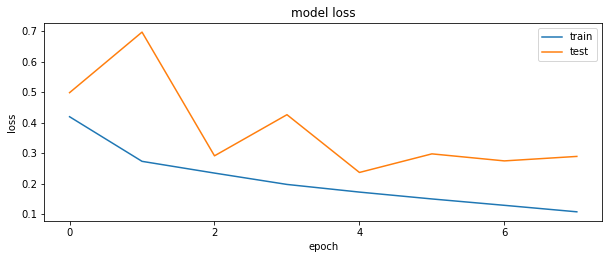

In [18]:
plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

In [156]:
K.clear_session()

In [157]:
model5 = Sequential([
    
    Conv2D(32 , kernel_size= (3,3)  , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Conv2D(64 , kernel_size= (3,3) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Flatten(),
    Dense(260, activation ='relu'),
    Dropout(0.5),
    Dense(10 , activation='softmax')
])

In [158]:
# compiling the model

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [159]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history2 = model5.fit(xtrain, ytrain, epochs=15 , verbose =1 , batch_size=70, callbacks=[callback], validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 28s 580us/sample - loss: 0.6277 - acc: 0.7678 - val_loss: 0.4190 - val_acc: 0.8436
Epoch 2/15
48000/48000 [==============================] - 29s 597us/sample - loss: 0.4126 - acc: 0.8487 - val_loss: 0.3322 - val_acc: 0.8782
Epoch 3/15
48000/48000 [==============================] - 30s 628us/sample - loss: 0.3573 - acc: 0.8692 - val_loss: 0.2997 - val_acc: 0.8926
Epoch 4/15
48000/48000 [==============================] - 39s 812us/sample - loss: 0.3267 - acc: 0.8799 - val_loss: 0.2795 - val_acc: 0.8961
Epoch 5/15
48000/48000 [==============================] - 39s 812us/sample - loss: 0.3035 - acc: 0.8884 - val_loss: 0.2713 - val_acc: 0.8982
Epoch 6/15
48000/48000 [==============================] - 40s 831us/sample - loss: 0.2884 - acc: 0.8962 - val_loss: 0.2593 - val_acc: 0.9042
Epoch 7/15
48000/48000 [==============================] - 42s 873us/sample - loss: 0.2742 - acc: 0.8990 

In [160]:
# testing the model
score = model5.evaluate(xtest, ytest)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 2s 163us/sample - loss: 0.2364 - acc: 0.9140

Test accuracy:  0.914


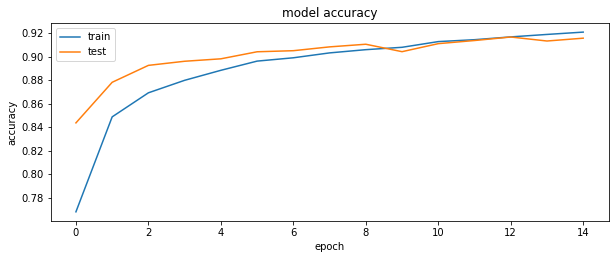

In [161]:
plt.subplot(2,1,2)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

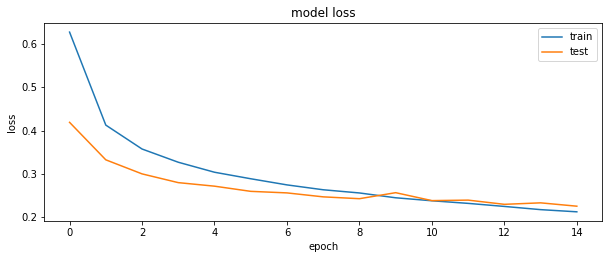

In [162]:
plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

In [163]:
K.clear_session()

In [164]:
model6 = Sequential([
    Conv2D(64 , kernel_size= (3,3) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(32 , kernel_size= (3,3) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Flatten(),
    Dense(260, activation ='relu'),
    BatchNormalization(),
    Dense(10 , activation='softmax')
])

In [165]:
# compiling the model

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [166]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history2 = model6.fit(xtrain, ytrain, epochs=15 , verbose =1 , batch_size=64, callbacks=[callback], validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 57s 1ms/sample - loss: 0.4928 - acc: 0.8194 - val_loss: 0.3483 - val_acc: 0.8736
Epoch 2/15
48000/48000 [==============================] - 59s 1ms/sample - loss: 0.3515 - acc: 0.8723 - val_loss: 0.3129 - val_acc: 0.8854
Epoch 3/15
48000/48000 [==============================] - 58s 1ms/sample - loss: 0.3125 - acc: 0.8836 - val_loss: 0.2821 - val_acc: 0.8929
Epoch 4/15
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.2870 - acc: 0.8929 - val_loss: 0.2793 - val_acc: 0.8942
Epoch 5/15
48000/48000 [==============================] - 56s 1ms/sample - loss: 0.2689 - acc: 0.9003 - val_loss: 0.2571 - val_acc: 0.9054
Epoch 6/15
48000/48000 [==============================] - 55s 1ms/sample - loss: 0.2534 - acc: 0.9053 - val_loss: 0.2460 - val_acc: 0.9082
Epoch 7/15
48000/48000 [==============================] - 56s 1ms/sample - loss: 0.2450 - acc: 0.9079 - val_loss: 0.

In [167]:
# testing the model
score = model6.evaluate(xtest, ytest)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 2s 203us/sample - loss: 0.2658 - acc: 0.9054

Test accuracy:  0.9054


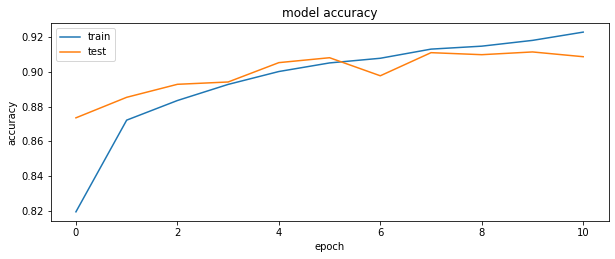

In [168]:
plt.subplot(2,1,2)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

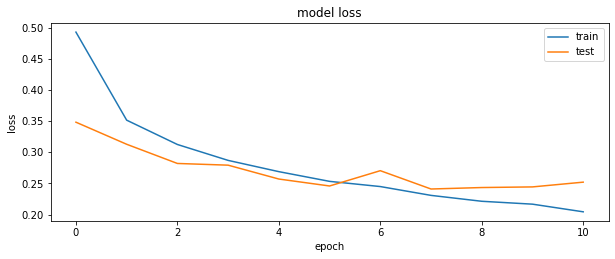

In [169]:
plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

In [170]:
model6.predict(xtest)

array([[3.3162845e-08, 9.3260986e-08, 2.5563446e-07, ..., 1.9680170e-05,
        2.1824822e-07, 9.9996793e-01],
       [1.4217173e-04, 3.6163303e-07, 9.9967575e-01, ..., 2.6885909e-08,
        3.1996527e-07, 4.8449266e-08],
       [5.4616841e-08, 9.9999976e-01, 1.7061603e-09, ..., 9.5911412e-10,
        6.3548477e-08, 3.0660388e-10],
       ...,
       [1.1907947e-08, 9.2649186e-09, 5.5714207e-09, ..., 8.0243527e-11,
        9.9999952e-01, 2.8895412e-11],
       [2.9548218e-08, 9.9999976e-01, 3.7102561e-09, ..., 1.4170253e-08,
        2.8114465e-07, 4.4858242e-09],
       [9.3943876e-04, 5.2002688e-05, 1.5770110e-03, ..., 4.7959156e-02,
        1.7599789e-02, 7.0305909e-03]], dtype=float32)